Construct underlying aseet pools

In [97]:
from scipy.linalg import cholesky
import numpy as np
def equity_value(cor):
    #input cor is the correlation between different assets

    n = 50 #number of assets
    percentage = 0.1#how many asset belongs to the equity tranche
    size = percentage*n
    time_period = 500 # the number of time periods of assets
    interest_rate = 0.2 # interest rate of equity tranche
    mc = 100 #number of times of monte carlo
    # Correlation matrix
    corr_mat= np.full((n,n),cor)
    row, col = np.diag_indices_from(corr_mat)
    corr_mat[row,col] = 1
    # Compute the (upper) Cholesky decomposition matrix
    upper_chol = cholesky(corr_mat)

    # Generate 3 series of normally distributed (Gaussian) numbers
    value = 0
    for i in range(mc):
        
        rnd = np.random.normal(0.6, 1.0, size=(time_period, n))
        # Finally, compute the inner product of upper_chol and rnd
        ans = rnd @ upper_chol
        total_value = np.sum(ans)/time_period
        value += total_value*0.2 + interest_rate * size
        value /= mc
    return value


In [98]:
x = [x/100 for x in range(100)]
y = [equity_value(y) for y in x]


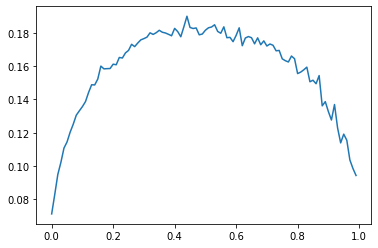

In [99]:
import matplotlib.pyplot as plt
plt.plot(x,y)

From the plot, we can see that, the value of CDO eqiuty tranch(trash tranch) will firstly increase with the correlation between underlying asset, but then decrease. This seems to be reasonable. Beacause, there are two forces that could drive the value of CDO, the volatility of the option, the overall default rate. When the correlation increases, the volatility of cash flows increase, and the value of the option increases, however, the default rate also increases, the expected total value of cash flows would drop drastically.